In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [201]:
df = pd.read_csv("term-deposit-marketing-2020.csv", sep=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [202]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


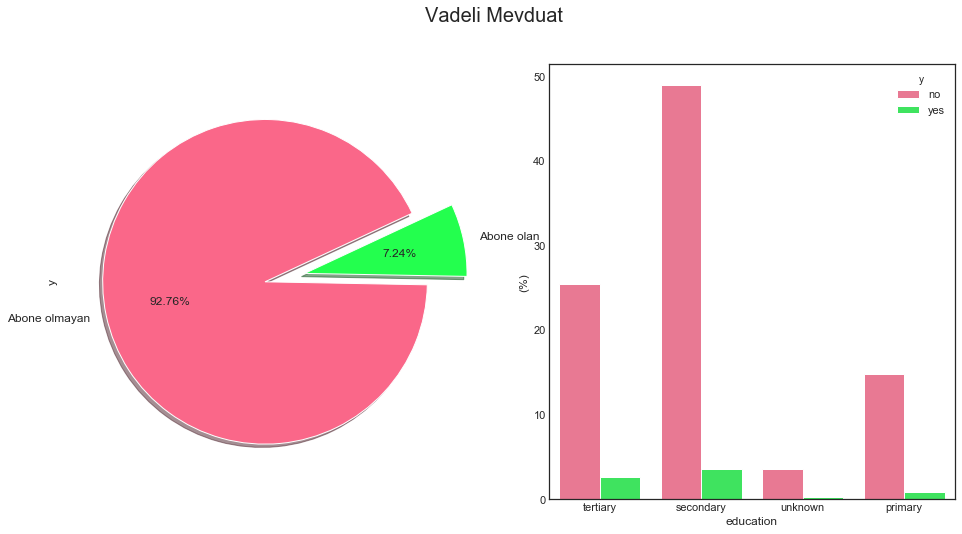

In [204]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA6789", "#23FF4E"]
labels ="Abone olmayan", "Abone olan"

plt.suptitle('Vadeli Mevduat', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

sns.barplot(x="education", y="balance", hue="y", data=df, palette=colors, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

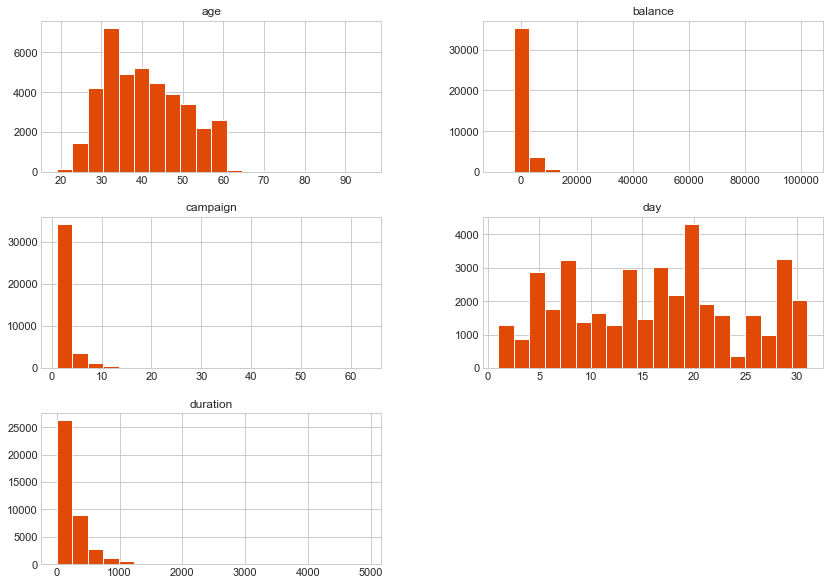

In [206]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [207]:
df["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

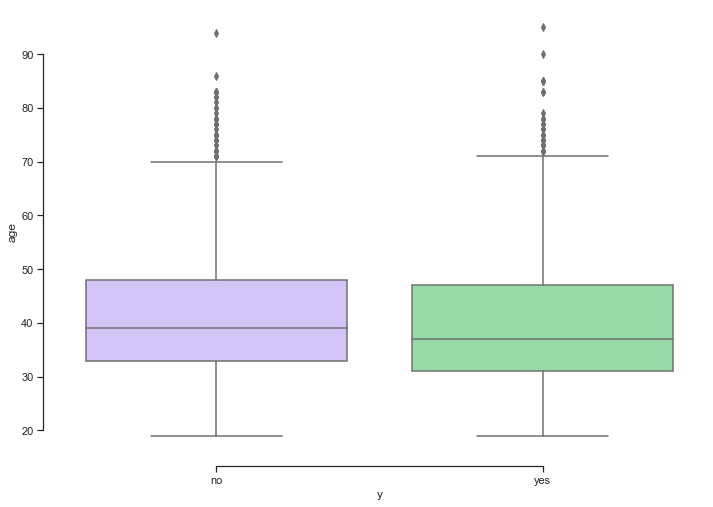

In [210]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="y",y="age",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [211]:
y_age_class = pd.crosstab(index=df["age"], 
                             columns=df["y"],
                             margins=True)

y_age_class

y,no,yes,All
age,,,
19,10,2,12
20,18,4,22
21,32,7,39
22,62,9,71
23,132,17,149
24,198,31,229
25,359,58,417
26,592,81,673
27,687,70,757


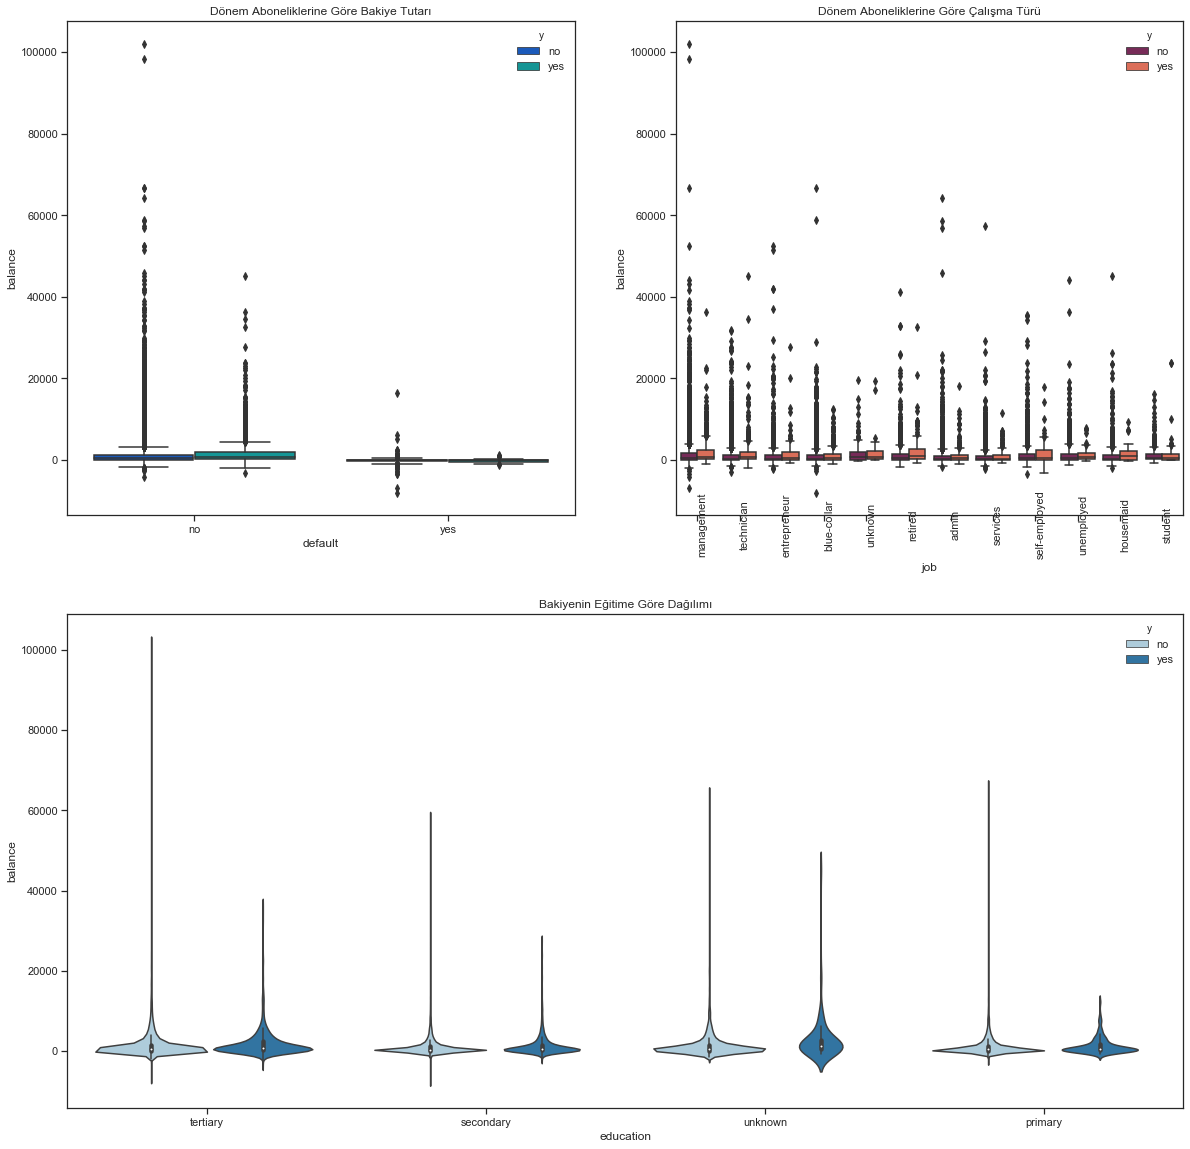

In [212]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="y",
                    data=df, palette="winter", ax=ax1)

g.set_title("Dönem Aboneliklerine Göre Bakiye Tutarı")

g1 = sns.boxplot(x="job", y="balance", hue="y",
                 data=df, palette="rocket", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Dönem Aboneliklerine Göre Çalışma Türü")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="y", palette="Paired")
g2.set_title("Bakiyenin Eğitime Göre Dağılımı")
plt.show()

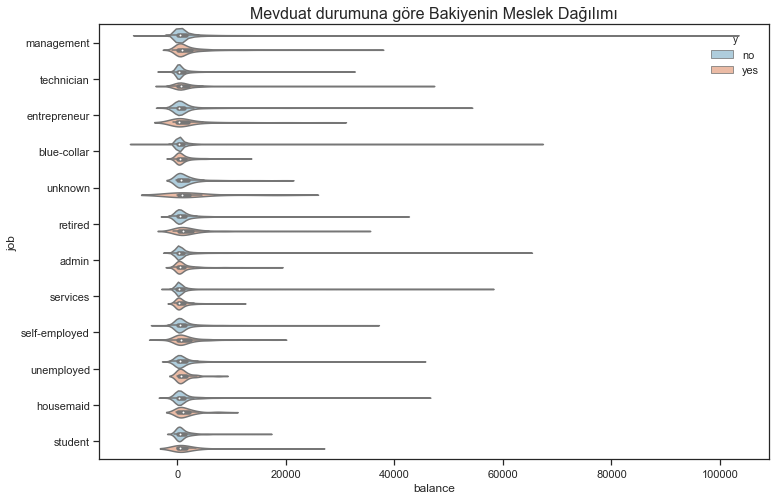

In [213]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="y", palette="RdBu_r",
            data=df);

plt.title("Mevduat durumuna göre Bakiyenin Meslek Dağılımı", fontsize=16)

plt.show()

In [214]:
df["balance"].groupby(df["job"]).describe()

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
admin,4483.0,1071.794111,2633.643058,-1601.0,44.50,375.0,1114.0,64343.0
blue-collar,9383.0,1056.803155,2206.054343,-8019.0,51.00,377.0,1158.5,66653.0
entrepreneur,1405.0,1452.220641,3922.060541,-2082.0,37.00,341.0,1249.0,52499.0
housemaid,1087.0,1327.157314,2939.895734,-1941.0,50.00,390.0,1334.5,45141.0
management,8166.0,1688.052902,3849.616616,-6847.0,72.00,518.0,1691.0,102127.0
retired,1437.0,1513.709116,3133.081518,-1598.0,79.00,514.0,1640.0,41242.0
self-employed,1414.0,1513.509194,3235.335044,-3313.0,96.25,472.0,1498.0,35589.0
services,3910.0,977.701279,2163.973389,-2122.0,28.00,324.0,1045.0,57435.0
student,524.0,1288.769084,2412.317764,-679.0,140.75,478.0,1444.0,23878.0


In [215]:
df["age"].groupby(df["job"]).describe()

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
admin,4483.0,39.259648,9.148068,20.0,32.0,38.0,46.0,75.0
blue-collar,9383.0,40.040286,8.932555,20.0,33.0,39.0,47.0,66.0
entrepreneur,1405.0,41.957295,8.833432,23.0,35.0,41.0,49.0,61.0
housemaid,1087.0,45.443422,9.739625,22.0,37.5,46.0,54.0,82.0
management,8166.0,40.443669,9.022674,22.0,33.0,39.0,47.0,76.0
retired,1437.0,57.185108,7.064307,24.0,55.0,58.0,59.0,95.0
self-employed,1414.0,40.630835,9.234052,24.0,33.0,39.0,48.0,72.0
services,3910.0,38.868286,8.954151,20.0,32.0,37.0,46.0,60.0
student,524.0,27.561069,4.737678,19.0,25.0,27.0,30.0,48.0


In [216]:
df["job"].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

In [217]:
y_job_class = pd.crosstab(index=df["job"], 
                             columns=df["y"],
                             margins=True,normalize='index')

y_job_class

y,no,yes
job,,
admin,0.921704,0.078296
blue-collar,0.942982,0.057018
entrepreneur,0.937367,0.062633
housemaid,0.951242,0.048758
management,0.917218,0.082782
retired,0.894920,0.105080
self-employed,0.920792,0.079208
services,0.939130,0.060870
student,0.843511,0.156489


Mavi-yakalı mesleği bu veri setinde en yaygın meslektir.

En yüksek yaş aralığına sahip meslek grubu emekli, en düşük yaş aralığına sahip meslek grubu öğrencidir.

Bakiye oranı en yüksek olan meslek grubu yönetim'dir.

Emekli ve öğrenci grubundaki kişilerin vadeli mevduat açtırma olasılığının daha yüksek olduğunu görmekteyiz.

In [218]:
df["marital"].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

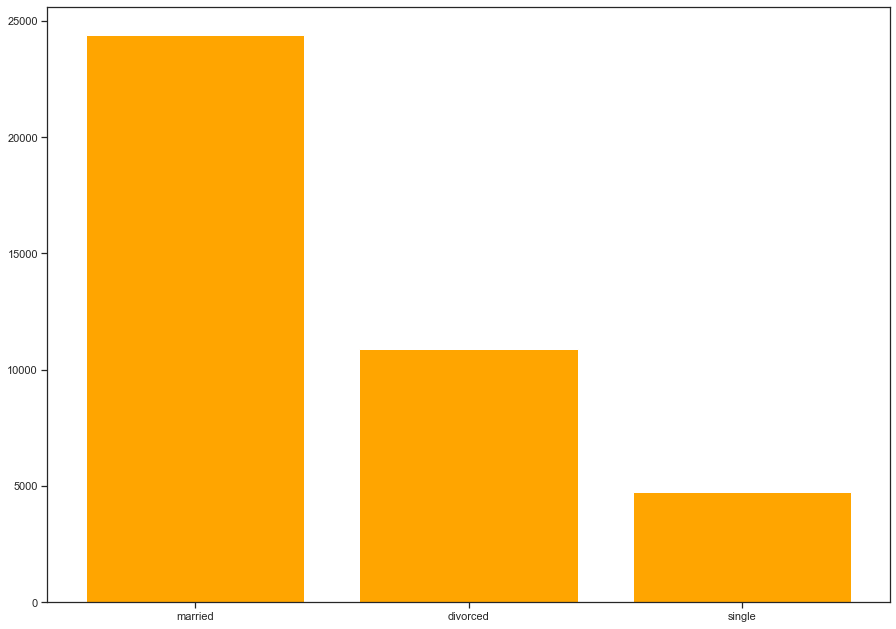

In [219]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,vals,color = 'orange')
plt.show()

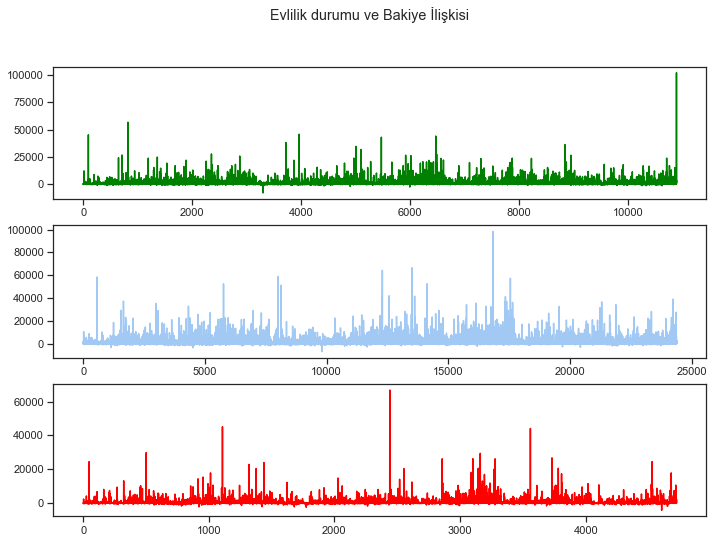

In [220]:
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values

fig, axs = plt.subplots(3)
fig.suptitle('Evlilik durumu ve Bakiye İlişkisi')
axs[0].plot(single,color="green")
axs[1].plot(married)
axs[2].plot(divorced,color="red")

Evlilik durumunda boşanmış kişilerin daha az bakiyeye sahip olduğu görülmektedir.

In [221]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'unknown'), 'marital/education'] = 'single/unknown'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'unknown'), 'marital/education'] = 'married/unknown'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'unknown'), 'marital/education'] = 'divorced/unknown'
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,marital/education
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,married/tertiary
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,single/secondary
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,married/secondary
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,married/unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,single/unknown


Text(0.5, 1.0, 'Eğitim/Evlilik durumu değişkenine göre Ortanca Bakiye')

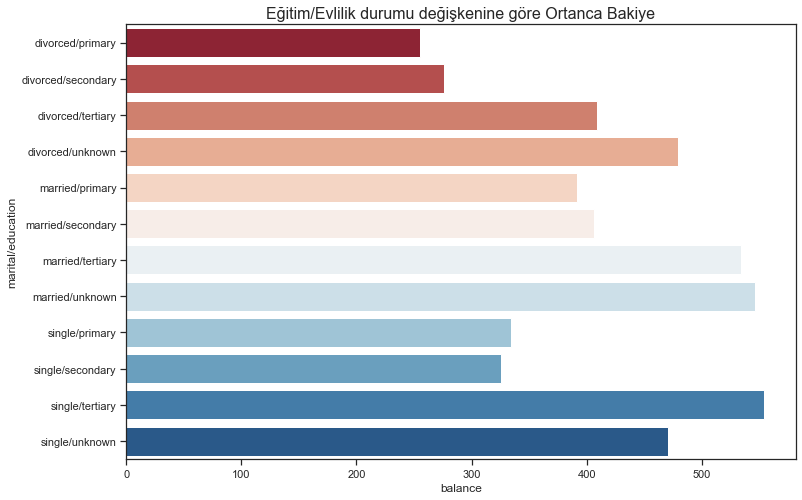

In [222]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()
fig = plt.figure(figsize=(12,8))
sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")
plt.title('Eğitim/Evlilik durumu değişkenine göre Ortanca Bakiye', fontsize=16)

Eğitim ve Evlilik durumu gruplamasında, boşanmış kişilerin eğitim durumlarına bakılmaksızın düşük ortalama bakiyeye, bekar kişilerin yüksek ortalama bakiyelere sahip gruplar olduğu görülmektedir. 

Bekar ve üçüncül eğitime sahip kişilerin bakiye ortalaması en yüksek, boşanmış ve birincil eğitime sahip kişilerin en düşük ortalama bakiyeye sahip olduğu görülmektedir.

Boşanma durumu müşterinin bakiyesinde önemli bir düşüşe neden olmaktadır.

Birincil eğitime sahip müşteriler medeni durumları gözetmeksizin düşük bakiyelere sahiptir. Eğitimin de bakiye durumunda etkili olduğu görülmektedir.

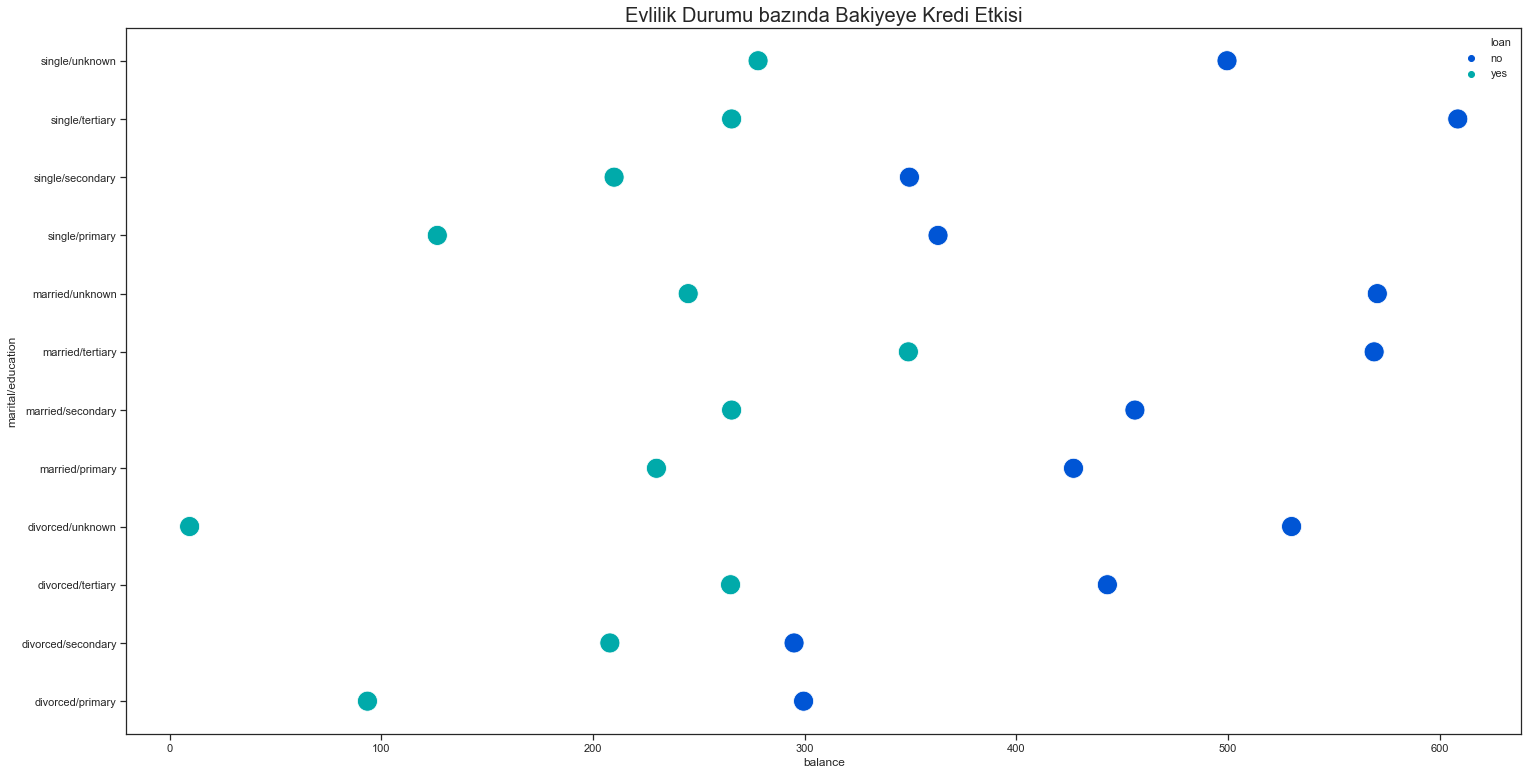

In [223]:
loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()
fig = plt.figure(figsize=(25,13))

sns.scatterplot(x="balance", y="marital/education", hue="loan", palette="winter",s=400,
            data=loan_balance);

plt.title("Evlilik Durumu bazında Bakiyeye Kredi Etkisi", fontsize=20)

plt.show()

Müşterinin önceden bir krediye sahip olup olmama durumu incelendiğinde,

Bakiyesi daha yüksek müşterilerin daha önce krediye sahip olmadıkları, 
daha düşük bakiyeye sahip müşterilerin önceden bir kredilerinin var olduğu görülmektedir.

In [224]:
lbe = LabelEncoder()
df["y"] = lbe.fit_transform(df["y"])

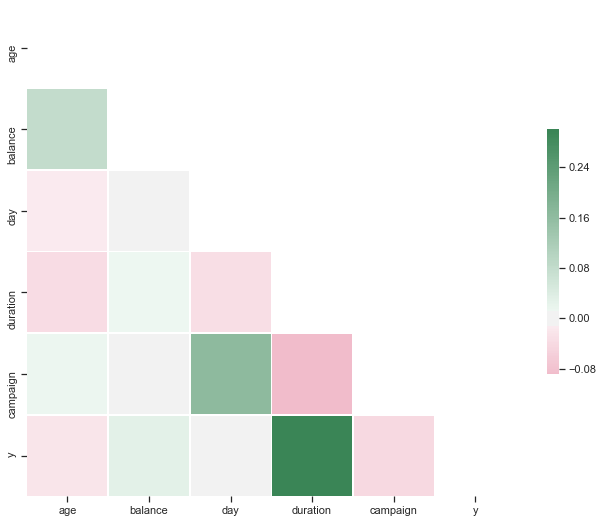

In [225]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(1, 139, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Hedef değişkeni ile Süre değişkeni arasında bir ilişki görülmektedir. Sürenin yüksekliğine bağlı olarak, müşterinin vadeli mevduat açma olasılığı da yükselmektedir.

Kampanya ile hedef değişkeni arasında negatif bir ilişki vardır. Buradan pazarlama departmanının müşteriye ulaşma sıklığının, müşterinin vadeli mevduat aboneliği açtırma olasılığını düşürmekte olduğu sonucuna ulaşılabilir.

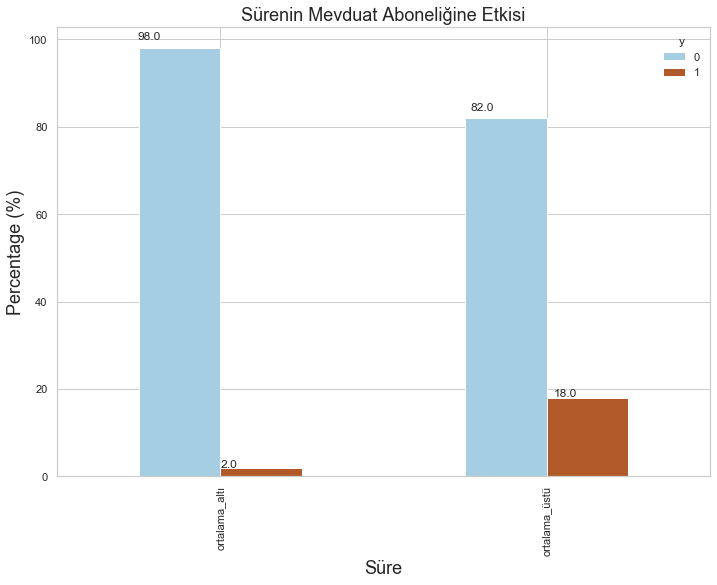

In [226]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "ortalama_altı"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "ortalama_üstü"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

ax = pct_term.plot(kind='bar', stacked=False, cmap='Paired')
plt.title("Sürenin Mevduat Aboneliğine Etkisi", fontsize=18)
plt.xlabel("Süre", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
plt.show()

Ortalamanın üzerindeki sürede müşterinin abonelik açtırma olasılığı, ortalama süre altındakileri göre %16 daha yüksektir. Süre değişkeninin abonelik tercihlerinde etkili olduğu görülmektedir. Sürenin ortalamadan yüksek olduğu müşteri tipinin vadeli mevduat hesabı açma olasılığının daha yüksek olduğu söylenebilir.

In [227]:
y_month_class = pd.crosstab(index=df["month"], 
                             columns=df["y"],
                             margins=True)

y_month_class

y,0,1,All
month,,,
apr,2267,451,2718
aug,4927,288,5215
dec,12,1,13
feb,2041,255,2296
jan,1138,38,1176
jul,5996,384,6380
jun,4440,294,4734
mar,133,125,258
may,12741,791,13532


Aylık bazda incelendiğinde, 
Pazarlamanın en yüksek tutulduğu ay Mayıs ayıdır. Buna rağmen aynı ayın abonelik edindirme başarısı yüksektir. İnceleme sonucu pazarlamanın Şubat-Nisan aralığına kaydırılması daha olumlu bir strateji olacağını göstermektedir. Ayrıca Ekim ayınında daha yüksek olumlu dönüşlerin olduğu görülmektedir. Aralık ayında pazarlama faaliyetinin en düşük ayıdır.

Müşteriler, ilkbahar aylarında (ve ek olarak Ekim) vadeli mevduata abone olmaya daha fazla eğilim göstermektedir.

In [228]:
df.drop(['marital/education', 'duration_status'], axis=1, inplace=True)
dep = df['y']
df.drop(labels=['y'], axis=1,inplace=True)
df.insert(0, 'y', dep)
df.head()

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1


In [229]:
y_hous_class = pd.crosstab(index=df["housing"], 
                             columns=df["y"],
                             margins=True)

y_hous_class

y,0,1,All
housing,,,
no,14537,1432,15969
yes,22567,1464,24031
All,37104,2896,40000


Konut kredisi olan müşteriler ile olmayan müşteriler arasında vadeli mevduat hesabı açtıran kişi oranı arasında ciddi bir fark olduğu görülmektedir.

In [230]:
df["balance"].groupby(df["housing"]).describe()

,count,mean,std,min,25%,50%,75%,max
housing,,,,,,,,
no,15969.0,1452.188052,3451.088679,-8019.0,51.0,419.0,1493.0,102127.0
yes,24031.0,1156.053056,2466.979488,-4057.0,57.0,400.0,1226.5,58544.0


Ev kredisi olan müşteriler incelendiğinde bakiye miktarı ev kredisi olmayanlara göre daha düşük olduğu, dolayısıyla vadeli mevduat açtırmaya daha az eğilimli olduğu düşünülebilir.

In [231]:
df["balance"].groupby(df["loan"]).describe()

,count,mean,std,min,25%,50%,75%,max
loan,,,,,,,,
no,33070.0,1381.409616,3059.129778,-4057.0,74.0,448.5,1423.00,102127.0
yes,6930.0,763.042713,1922.406217,-8019.0,1.0,249.5,852.75,51439.0


In [232]:
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=565)

for train_set, test_set in stratified.split(df, df["loan"]):
    stratified_train = df.loc[train_set]
    stratified_test = df.loc[test_set]
    
train_data = stratified_train
test_data = stratified_test
train_data.shape

(32000, 14)

In [233]:
test_data.shape

(8000, 14)

In [234]:
train_data['y'].value_counts()

0    29660
1     2340
Name: y, dtype: int64

In [235]:
#Machine Learning with Scikit Learn and Tensorflow-Aurelien Geron.

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [236]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [237]:
df.columns

Index(['y', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'],
      dtype='object')

In [238]:
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month"
                                     ])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [239]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-1.92033011,  0.91208363,  0.3585171 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.05323175, -0.35620539,  0.1168906 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.88305324, -0.16400979, -0.97042866, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.15422362,  0.10964174,  1.44583636, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57187018, -0.2855205 , -1.33286842, ...,  1.        ,
         0.        ,  0.        ],
       [-0.88305324, -0.43160262, -1.21205517, ...,  0.        ,
         0.        ,  0.        ]])

In [240]:
y_train = train_data['y']
y_test = test_data['y']
y_train.shape

(32000,)

In [241]:
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False,  True, False, ..., False, False, False])

In [242]:
some_instance = X_train[388]

In [243]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [244]:
#Ahspinar
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [245]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.17 s
trained Nearest Neighbors in 0.09 s
trained Linear SVM in 9.17 s
trained Gradient Boosting Classifier in 3.96 s
trained Decision Tree in 0.20 s
trained Random Forest in 0.40 s
trained Neural Net in 3.13 s
trained Naive Bayes in 0.03 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.204478
5                 Random Forest     0.997969       0.404503
1             Nearest Neighbors     0.948281       0.094330
3  Gradient Boosting Classifier     0.942625       3.958159
0           Logistic Regression     0.934937       0.173883
6                    Neural Net     0.934844       3.129587
2                    Linear SVM     0.933469       9.167869
7                   Naive Bayes     0.900156       0.030105


In [246]:
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

total_model = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=total_model)

In [247]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.937719
0,Logistic Reg.,0.934781
6,Neural Classifier,0.933875
7,Naives Bayes,0.933875
5,Rand FC,0.933688
1,SVC,0.931719
2,KNN,0.931125
3,Dec Tree,0.914438


In [248]:
y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.94


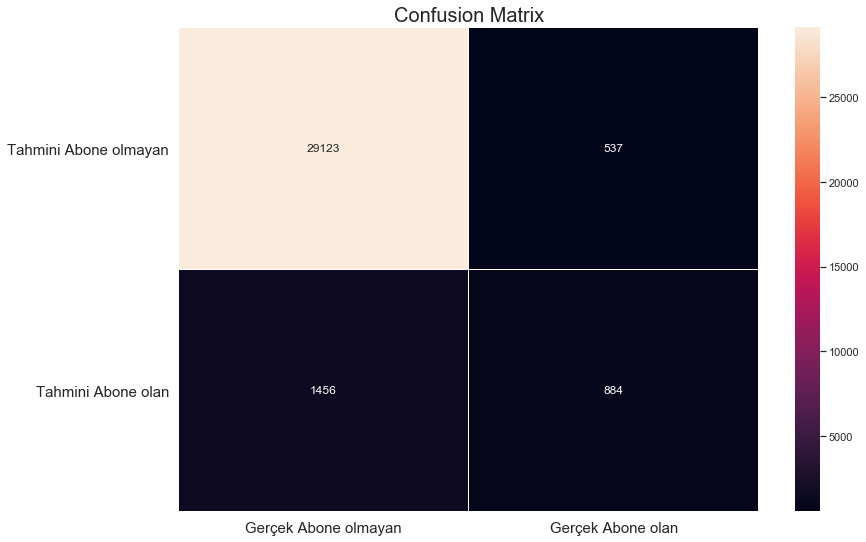

In [249]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Gerçek Abone olmayan', 'Gerçek Abone olan'], fontsize=15, rotation=360)
ax.set_yticklabels(['Tahmini Abone olmayan', 'Tahmini Abone olan'], fontsize=15, rotation=360)
plt.show()

In [250]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     29660
           1       0.62      0.38      0.47      2340

    accuracy                           0.94     32000
   macro avg       0.79      0.68      0.72     32000
weighted avg       0.93      0.94      0.93     32000



Precision Score:  0.62

Recall Score:  0.38

f1-score: 0.47

In [251]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-5.7612605])

In [252]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [253]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [254]:
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

In [255]:
print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9455263210977978
Neural Classifier Score:  0.9274905481496852
Naives Bayes Classifier:  0.7768369368512659


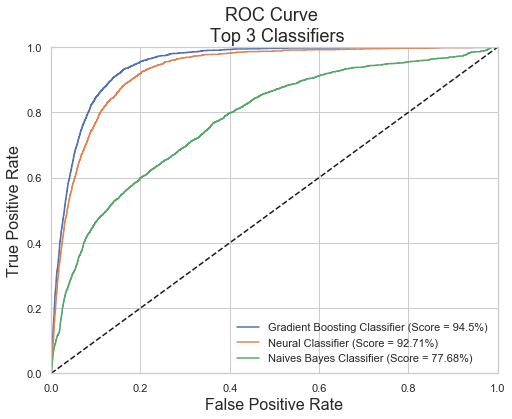

In [256]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 94.5%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 92.71%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 77.68%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

Feature sıralaması:
1. feature 11 (0.694612)
2. feature 10 (0.141658)
3. feature 9 (0.061748)
4. feature 8 (0.045435)
5. feature 6 (0.042457)
6. feature 12 (0.007529)
7. feature 5 (0.004019)
8. feature 3 (0.001065)
9. feature 0 (0.000870)
10. feature 2 (0.000514)
11. feature 1 (0.000094)
12. feature 7 (0.000000)
13. feature 4 (0.000000)


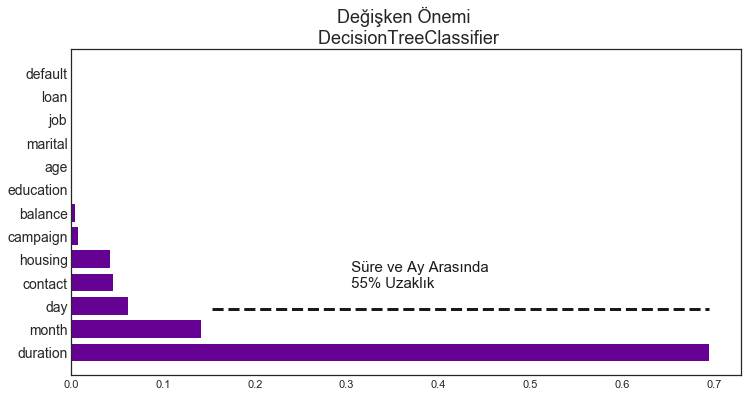

In [257]:
plt.style.use('seaborn-white')

df['job'] = df['job'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['default'] = df['default'].astype('category').cat.codes
df['loan'] = df['loan'].astype('category').cat.codes
df['housing'] = df['housing'].astype('category').cat.codes

target = 'y'
X = df.drop('y', axis=1)

label=df[target]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)
print("Feature sıralaması:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = df.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

#Importance
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Değişken Önemi \n DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#650294',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, ' Süre ve Ay Arasında \n 55% Uzaklık ', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [258]:
voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='soft'
)

for clf in (grad_clf, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.939375
GaussianNB 0.93275
MLPClassifier 0.928
VotingClassifier 0.931875


ÖZET

25 yaş altı ve 60 yaş üzeri müşterilerin daha fazla abonelik açtırma olasılığı olduğu görülmektedir. 

Mavi-yakalı mesleği bu veri setinde en yaygın meslektir. Buna rağmen mavi yakalı meslek grubunun mevduat hesabı açtırma olasılığı ortalamanın altında bir orana sahiptir. Mavi yakalı müşteri tipinden yüksek oranda bir geri dönüş sağlanamamıştır.

En yüksek yaş aralığına sahip meslek grubu emekli, en düşük yaş aralığına sahip meslek grubu öğrencidir.

Bakiye oranı en yüksek olan meslek grubu yönetim'dir. Yine de bakiye durumuna göre abonelik açtırma olasılığı en yüksek meslek grubu değildir. Demek ki tek başına meslek abonelik açtırmak için yeterli bir etken değil.

Emekli ve öğrenci grubundaki kişilerin vadeli mevduat açtırma olasılığının daha yüksek olduğunu görmekteyiz.

Evlilik durumunda boşanmış kişilerin daha az bakiyeye sahip olduğu görülmektedir.

Eğitim ve Evlilik durumu gruplamasında, boşanmış kişilerin eğitim durumlarına bakılmaksızın düşük ortalama bakiyeye, bekar kişilerin yüksek ortalama bakiyelere sahip gruplar olduğu görülmektedir. 

Bekar ve üçüncül eğitime sahip kişilerin bakiye ortalaması en yüksek, boşanmış ve birincil eğitime sahip kişilerin en düşük ortalama bakiyeye sahip olduğu görülmektedir.

Boşanma durumu müşterinin bakiyesinde önemli bir düşüşe neden olmaktadır.

Birincil eğitime sahip müşteriler medeni durumları gözetmeksizin düşük bakiyelere sahiptir. Eğitimin de bakiye durumunda etkili olduğu görülmektedir.

Müşterinin önceden bir krediye sahip olup olmama durumu incelendiğinde,

Bakiyesi daha yüksek müşterilerin daha önce krediye sahip olmadıkları, daha düşük bakiyeye sahip müşterilerin önceden bir kredilerinin var olduğu görülmektedir.

Ortalamanın üzerinde verilen süre ile müşterinin abonelik açtırma olasılığı, ortalama süre altındakileri göre %16 daha yüksektir. Süre değişkeninin abonelik tercihlerinde etkili olduğu görülmektedir. Sürenin ortalamadan yüksek olduğu müşteri tipinin vadeli mevduat hesabı açma olasılığının daha yüksek olduğu söylenebilir.

Aylık bazda incelendiğinde, Pazarlamanın en yüksek tutulduğu ay Mayıs ayıdır. Buna rağmen aynı ayın abonelik edindirme başarısı yüksektir. İnceleme sonucu pazarlamanın Şubat-Nisan aralığına kaydırılması daha olumlu bir strateji olacağını göstermektedir. Ayrıca Ekim ayınında daha yüksek olumlu dönüşlerin olduğu görülmektedir. Aralık ayında pazarlama faaliyetinin en düşük ayıdır.

Müşteriler, ilkbahar aylarında (ve ek olarak Ekim) vadeli mevduata abone olmaya daha fazla eğilim göstermektedir.

Ev kredisi olan müşteriler incelendiğinde bakiye miktarı ev kredisi olmayanlara göre daha düşük olduğu, dolayısıyla vadeli mevduat açtırmaya daha az eğilimli olduğu düşünülebilir.

MODEL

Uygulanan kollektif öğrenme metodu Voting Classifier ile iyileştirme yapılan modeller arasından en yüksek başarı oranına sahip olan Gradient Boosting Classifier seçilmiştir.